In [3]:
pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
#import required modules
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

In [5]:
#1. Load the Excel file
df = pd.read_excel("crop_price.xlsx") # Ensure this file is in the same folder

In [12]:
# 2.Display basic info
print("\n📌 Dataset Shape:", df.shape)
print("\n📌 First 5 Rows:")
print(df.head())





📌 Dataset Shape: (196, 9)

📌 First 5 Rows:
   SL.NO  COMMODITY  VARIETY       YEAR   MSP  MSP_ABSOLUTE_CHANGE  \
0      1          2        7  2018-2019  7511                  NaN   
1      2          2        0  2018-2019  7750                  NaN   
2      3          4        1  2018-2019  2030                  NaN   
3      4          8        1  2018-2019  3700                  NaN   
4      5          2        7  2019-2020  9521               2010.0   

   MSP_PERCENTAGE_CHANGE  CROP_TYPE  YEAR_NUMERIC  
0                    NaN          0          2018  
1                    NaN          0          2018  
2                    NaN          0          2018  
3                    NaN          0          2018  
4                  26.74          0          2019  


In [13]:
#3. Display column names
print("\n📌 Column Names:")
print(df.columns)


📌 Column Names:
Index(['SL.NO', 'COMMODITY', 'VARIETY', 'YEAR', 'MSP', 'MSP_ABSOLUTE_CHANGE',
       'MSP_PERCENTAGE_CHANGE', 'CROP_TYPE', 'YEAR_NUMERIC'],
      dtype='object')


In [14]:
#4.Clean the data
df = df.dropna(subset=["MSP"])

df["YEAR_NUMERIC"] = df["YEAR"].apply(lambda x: int(str(x).split("-")[0]))

In [15]:
#5.Encode categorical columns
label_encoders = {}
for col in ["COMMODITY", "VARIETY", "CROP_TYPE"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:
#6.Select features and target
features = ["COMMODITY", "VARIETY", "CROP_TYPE", "YEAR_NUMERIC"]
X = df[features]
y = df["MSP"]

In [17]:
#7.Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#8. Hyperparameter tuning with GridSearchCV 
param_grid = { "n_estimators": [50, 100, 150], "max_depth": [3, 5, 7], "learning_rate": [0.05, 0.1, 0.2], "subsample": [0.8, 1], "colsample_bytree": [0.8, 1] }

grid_search = GridSearchCV( estimator=XGBRegressor(random_state=42), param_grid=param_grid, scoring="r2", cv=5, verbose=1, n_jobs=-1 )
print("🔍 Performing Grid Search for best parameters...") 
grid_search.fit(X_train, y_train) 
model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_) 
print("✅ Best Cross-Validation R² Score: {:.2f}%".format(grid_search.best_score_ * 100))


🔍 Performing Grid Search for best parameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
✅ Best Cross-Validation R² Score: 97.19%


In [20]:
#9. Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
 
r2 = r2_score(y_test, y_pred) 
print(f"Model Accuracy (R² Score): {r2:.2%}")

print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")


Model Accuracy (R² Score): 99.39%
Mean Absolute Error (MAE): ₹157.87
Root Mean Squared Error (RMSE): ₹201.81


📈 Actual vs Predicted MSP plot saved as actual_vs_predicted_msp.png


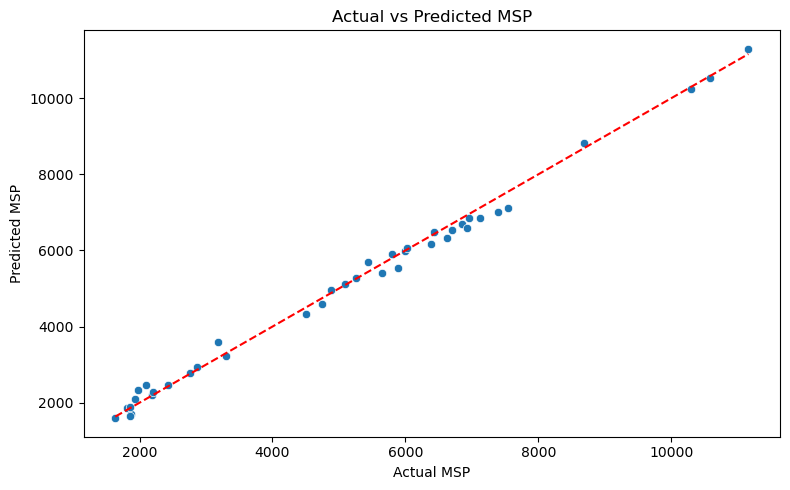

In [21]:
#10.Visualize Predictions with a Chart 
plt.figure(figsize=(8, 5)) 
plt.title("Actual vs Predicted MSP") 
sns.scatterplot(x=y_test, y=y_pred) 
plt.xlabel("Actual MSP") 
plt.ylabel("Predicted MSP") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # 45° line 
plt.tight_layout() 
plt.savefig("actual_vs_predicted_msp.png") 
print("📈 Actual vs Predicted MSP plot saved as actual_vs_predicted_msp.png")

In [22]:
#11.Export GridSearch Best Parameters
best_params = grid_search.best_params_ 
pd.DataFrame([best_params]).to_excel("best_xgb_params.xlsx", index=False) 
print("✅ Best parameters saved to best_xgb_params.xlsx")

✅ Best parameters saved to best_xgb_params.xlsx


In [ ]:
#12. comparing Actual vs predicted
output_df = X_test.copy() 
output_df["Actual_MSP"] = y_test.values 
output_df["Predicted_MSP"] = y_pred

In [24]:
#13. Save to Excel
output_df.to_excel("msp_predictions1.xlsx", index=False) 
print("✅ Predictions saved to msp_predictions3.xlsx")


✅ Predictions saved to msp_predictions3.xlsx


In [25]:
#14. save the Model
joblib.dump(model, "xgb_crop_model1.pkl") 
print("✅ Model saved as xgb_crop_model1.pkl")


✅ Model saved as xgb_crop_model1.pkl
